# Recurrence Exercise

- Give a tight $O$ bound for each of them.
  - Assume that $T(n)$ is constant for $n \leq 2$.
  
### (a) $\quad T(n) = T\left(\frac{2n}{3}\right) + 1$
### (b) $\quad T(n) = 2 T\left(\frac{n}{3}\right) + n$
### (c) $\quad T(n) = 2 T\left(n-1\right) + 1$
### (d) $\quad T(n) = T\left(\sqrt{n}\right) + 1$
### (e) $\quad T(n) = 2T\left(\frac{n}{4}\right) + \sqrt{n} \log_2{n}$

<hr>

## Notations

We use the following notations:

- $\lg n = \log_2 n$ (binary logarithm)
- $\lg^k n = (\lg n)^k$ (exponentiation)
- $\log \log n = \log (\log n)$ (composition)

## The master method

Consider the recurrence: $T(n) = aT(n/b) + f(n)$

where $a \geq 1, b > 1$ are constants and $f(n)$ be an asymptotically positive function.

- Case 1:
  - if $f(n) = O(n^{\log_b{a-\epsilon}})$ for some constant $\epsilon > 0$,
  - then $T(n) = \Theta(n^{\log_b{a}})$
- Case 2:
  - if $f(n) = \Theta(n^{\log_b{a}})$,
  - then $T(n) = \Theta(n^{\log_b{a}}\log n)$
- Case 3:
  - if $f(n) = \Omega(n^{\log_b{a+\epsilon}})$ for some constant $\epsilon > 0$,
    - and if $af(n/b) \leq cf(n)$ for some constant $c < 1$
  - then $T(n) = \Theta(f(n))$


## Solutions

### (a)

Use the master method with $a=1, b=3/2, f(n)=1$.

Case 2 applies because
  - $\log_b{a}=\log_{3/2}{1}=0$
  - thus $f(n)=\Theta(n^{\log_b{a}})=\Theta(n^0)=\Theta(1)$

Answer: $O(\log n)$.

### (b)

Use the master method with $a=2, b=3, f(n)=n$.

Case 3 applies because
- $\log_b{a}=\log_3{2}<1$
- thus $f(n)=\Omega(n^{\log_b{a+\epsilon}})$ for some $0 < \epsilon < 1 - \log_3{2}$
- and $af(n/b) = \frac{2}{3}n \leq n = f(n)$

Answer: $O(n)$.

### (c)

Plug and chug, then find a pattern:

$$
\begin{align*}
T(n) &=2[2T(n-2)+ 1] + 1\\
&=2[2[2T(n-3) + 1] + 1] + 1\\
&= 1 + 2 + 2^2 + \ldots + 2^{n-3} + 2^{n-2}\\
&= \sum_{i=0}^{n-2} 2^i\\
&= 2^{n-1} - 1\\
&= O(2^n)
\end{align*}
$$

Answer: $O(2^n)$.

### (d)

Let $k=\lg n$. Then, $T(n) = T(2^k) = T(2^{k/2})+1$.

We can see this as a function $S$ of $k$ such that $S(k)=T(2^k)$ and $S(1)=T(2)=1$. Now, the recurrence becomes a familiar form:

$S(k)=S(k/2)+1$

And by using the master theorem case 2, this is $O(\log k)$. Replace back $k$ with $O(\lg n)$.

$O(\log \lg n) = O(\log(\log n / \log 2)) = O(\log\log n - \log\log 2)$.

Answer: $O(\log \log n)$.

### (e)

First, let's check if the master method works with $a=2, b=4, f(n)=\sqrt{n}\log_2{n}$.

- $\log_b{a}=\log_4{2}=\frac{1}{2}$
- Case 2 does not apply because $f(n)=n^{\frac{1}{2}}\lg{n} \notin \Theta\left(n^\frac{1}{2}\right)$.
- Case 3 does not apply either because there is no $\epsilon > 0$ such that $f(n)=n^{\frac{1}{2}}\lg{n} = \Omega\left(n^{\frac{1}{2}+\epsilon}\right)$

Thus, we cannot use the master method. Instead, guess and prove by induction.

Let $g(n)=\sqrt{n}\lg^2 n$. Guess $T(n)=\Theta(g(n))$ and prove $\frac{g(n)}{4} \leq T(n) \leq g(n)$ for $n \geq 4$ by induction.

**Base case $n=4$:**

- $T(4)= 2T(1) + \sqrt{4}\lg 4 = 2\cdot 1 + 2\cdot 2 = 5$
- $g(4)=\sqrt{4}\lg^2{4}=2\cdot 2^2=8$
- $\frac{g(4)}{4}=2$

Thus, $\frac{g(n)}{4} \leq T(n) \leq g(n)$.

**Inductive step:**

Assume $\frac{g(n)}{4} \leq T(n) \leq g(n)$ for every $4 \leq n < k$. We want to show $\frac{g(k)}{4} \leq T(k)\leq g(k)$.

First, observe:

$$
\begin{align*}
g\left(\frac{n}{4}\right) &= \sqrt{\frac{n}{4}}\lg^2{\frac{n}{4}}\\
&= \frac{1}{2}\sqrt{n}\left(\lg{\frac{n}{4}}\right)^2\\
&= \frac{1}{2}\sqrt{n}\left(\lg{n} - \lg{4}\right)^2\\
&= \frac{1}{2}\sqrt{n}\left(\lg{n} - 2\right)^2\\
&= \frac{1}{2}\sqrt{n}\left(\lg^2{n} - 4\lg{n} + 4 \right)\\
&= \frac{1}{2}\sqrt{n}\lg^2{n} - 2\sqrt{n}\lg{n} + 2\sqrt{n}\\
&= \frac{g(n)}{2} - 2\sqrt{n}\lg{n} + 2\sqrt{n}
\end{align*}
$$

Then,

$$
\begin{align*}
T(k) &= 2T\left(\frac{k}{4}\right) + \sqrt{k}\lg k\\
&\leq 2g\left(\frac{k}{4}\right) + \sqrt{k}\lg k\\
&= 2\left(\frac{g(k)}{2} - 2\sqrt{k}\lg{k} + 2\sqrt{k}\right) + \sqrt{k}\lg{k}\\
&= g(k) - 4\sqrt{k}\lg{k} + 4\sqrt{k} + \sqrt{k}\lg{k}\\
&= g(k) - 3\sqrt{k}\lg{k} + 4\sqrt{k}\\
&= g(k) + \sqrt{k}(4 - 3\lg{k})\\
&\leq g(k) + \sqrt{k}(4 - 3\lg{4})\\
&= g(k) + \sqrt{k}(4 - 3\cdot 2)\\
&= g(k) - 2\sqrt{k}\\
&\leq g(k)
\end{align*}
$$

Likewise,

$$
\begin{align*}
T(k) &= 2T\left(\frac{k}{4}\right) + \sqrt{k}\lg k\\
&\geq \frac{2}{4}g\left(\frac{k}{4}\right) + \sqrt{k}\lg k\\
&= \frac{1}{2}\left(\frac{g(k)}{2} - 2\sqrt{k}\lg{k} + 2\sqrt{k}\right) + \sqrt{k}\lg{k}\\
&= \frac{g(k)}{4} - \sqrt{k}\lg{k} + \sqrt{k} + \sqrt{k}\lg{k}\\
&= \frac{g(k)}{4} + \sqrt{k}\\
&\geq \frac{g(k)}{4}
\end{align*}
$$

Answer: $O\left(\sqrt{n}\log^2{n}\right)$.

<hr>

## Experiments

In [1]:
from math import log, sqrt
from functools import partial
import plotly.graph_objects as go
from IPython.display import display, HTML, Markdown, Image

INTERACTIVE_CHARTS = False

def show_figure(fig, image_path: str):
    if INTERACTIVE_CHARTS:
        fig.show()
    else:
        fig.write_image(image_path)
        display(Image(image_path))

def create_line_chart(title, xs, funcs, width=800, height=800, xscale='log', yscale='log'):
    fig = go.Figure()
    
    # add traces
    for name, f in funcs:
        fig.add_trace(go.Scatter(x=xs, y=[f(x) for x in xs], mode='lines', name=name))

    fig.update_xaxes(title='n', type=xscale)
    fig.update_yaxes(title='f(n)', type=yscale)
    fig.update_layout(dict(title=f'Problem ({title})', showlegend=True, width=width, height=height))
    
    # show figure
    show_figure(fig, f'img/04_1_Recurrence_{title}.png')

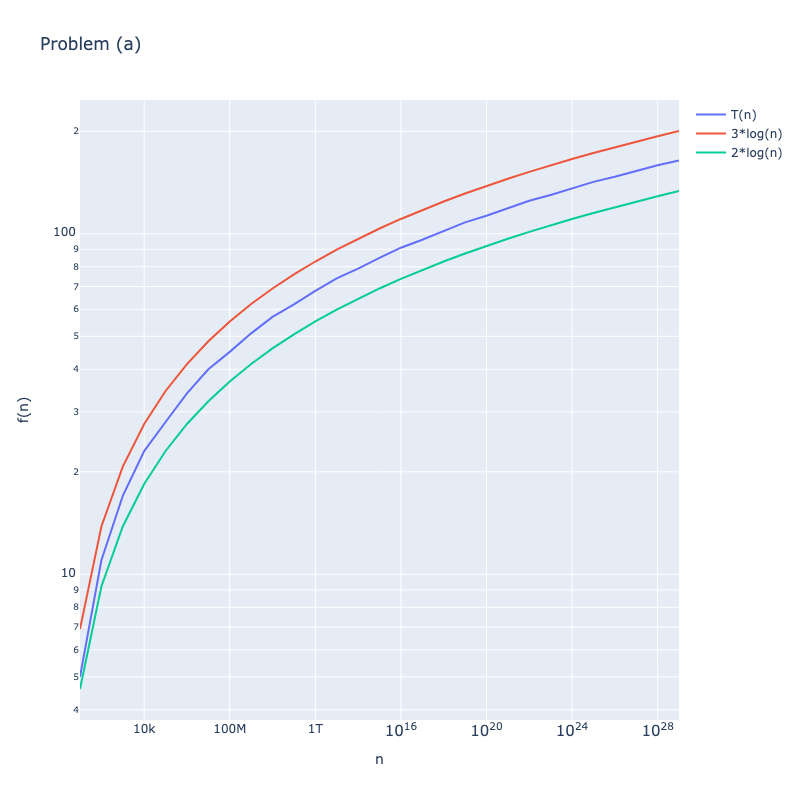

In [2]:
def problem_a(n):
    return 1 if n <= 2 else problem_a(2 * n / 3) + 1

xs = [10 ** i for i in range(1, 30)]
create_line_chart('a', xs, [
    ('T(n)', problem_a),
    ('3*log(n)', lambda n: 3 * log(n)),
    ('2*log(n)', lambda n: 2 * log(n)),
])

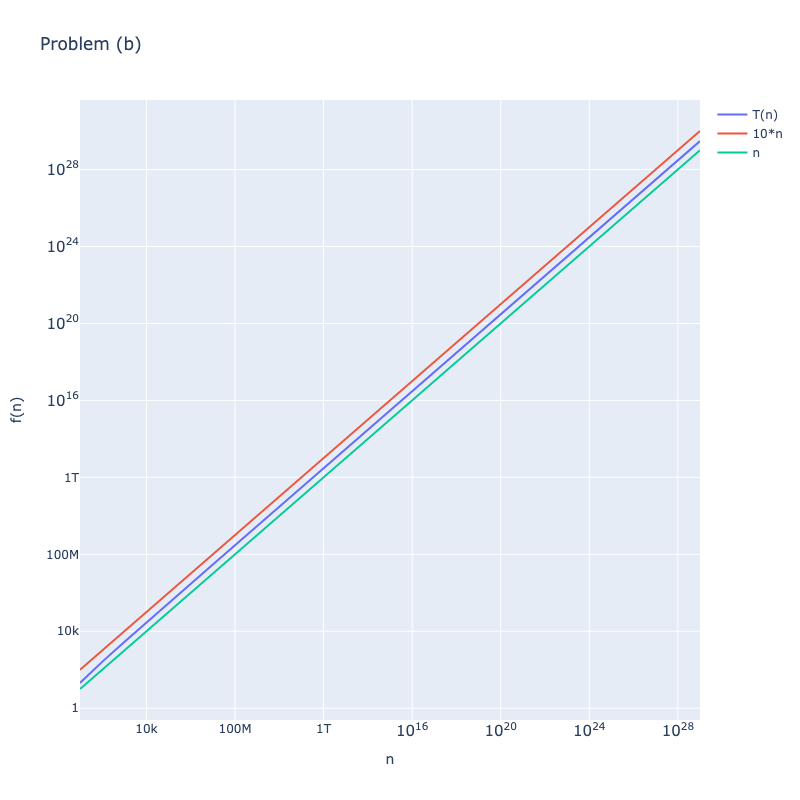

In [3]:
def problem_b(n):
    return 1 if n <= 2 else 2 * problem_b(n / 3) + n

xs = [10 ** i for i in range(1, 30)]
create_line_chart('b', xs, [
    ('T(n)', problem_b),
    ('10*n', lambda n: 10 * n),
    ('n', lambda n: n),
])

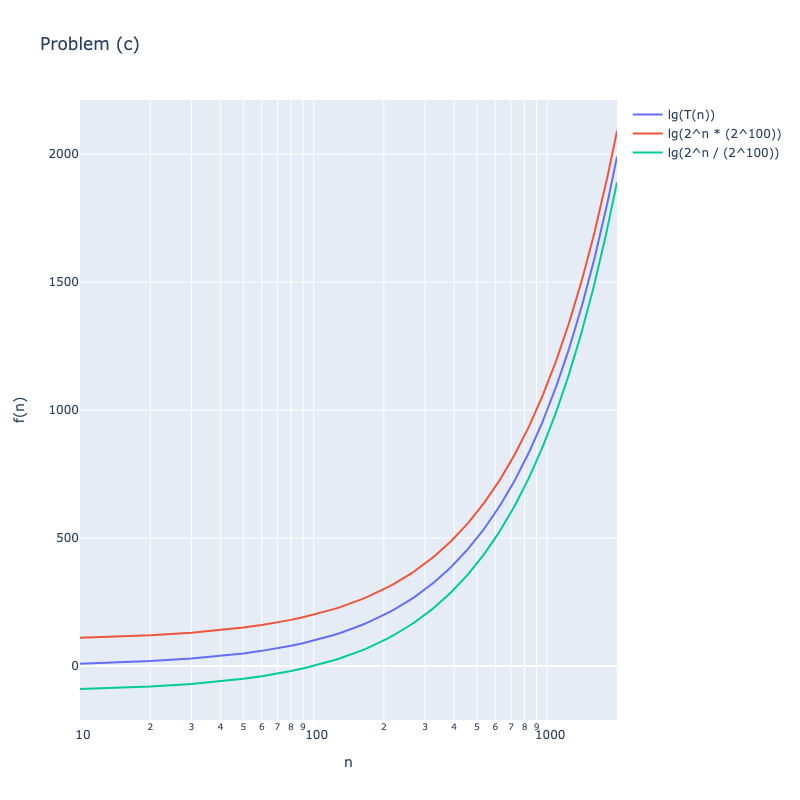

In [4]:
def problem_c(n):
    return 1 if n <= 2 else 2 * problem_c(n - 1) + 1

xs = [i for i in range(10, 2000, 10)]
create_line_chart('c', xs, [
    ('lg(T(n))', lambda n: log(problem_c(n), 2)),
    ('lg(2^n * (2^100))', lambda n: n + 100),
    ('lg(2^n / (2^100))', lambda n: n - 100),
], yscale='linear')

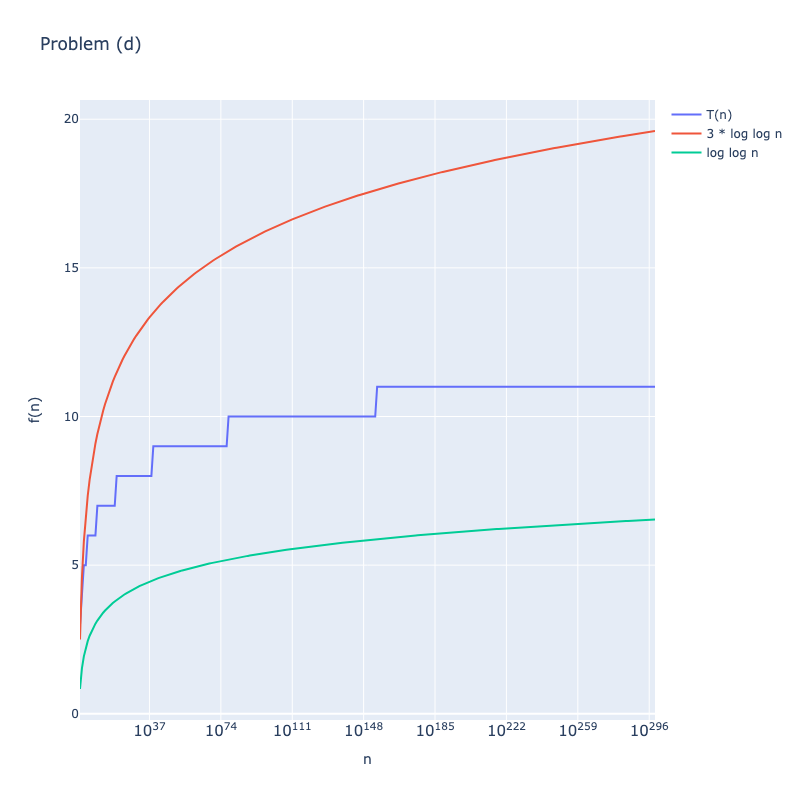

In [5]:
def problem_d(n):
    return 1 if n <= 2 else problem_d(sqrt(n)) + 1

xs = [10 ** i for i in range(1, 300)]
create_line_chart('d', xs, [
    ('T(n)', problem_d),
    ('3 * log log n', lambda n: 3 * log(log(n))),
    ('log log n', lambda n: log(log(n))),
], yscale='linear')

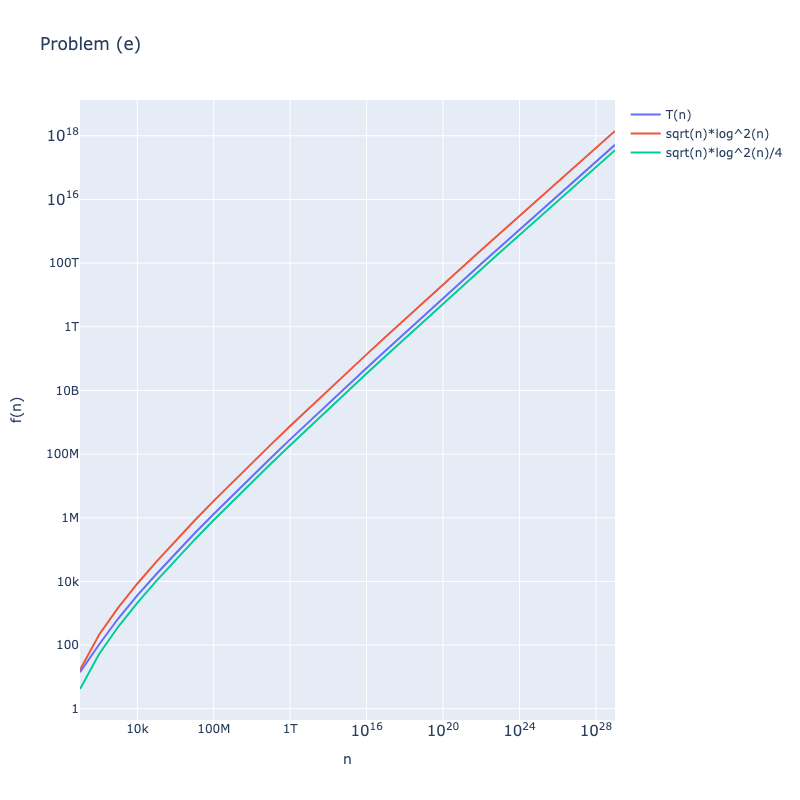

In [6]:
def problem_e(n):
    if n <= 2:
        return 1
    return 2 * problem_e(n / 4) + sqrt(n) * log(n)

def solution_e(c, n):
    return c * sqrt(n) * (log(n) ** 2)

xs = [10 ** i for i in range(1, 30)]
create_line_chart('e', xs, [('T(n)', problem_e), ('sqrt(n)*log^2(n)', partial(solution_e, 1)), ('sqrt(n)*log^2(n)/4', partial(solution_e, 1/4))])